In [1]:
import pandas as pd

df = pd.read_csv('data__antares-cse_cnt-iTXYCphp1AuE2WwH_noStartDate_noEndDate.csv')
df = df.drop(columns=['Data URI'])
df.head()


,Time,Content
0,2025-03-08T23:39:31.000Z,"{""devUI"":""08:D1:F9:35:B5:48"",""time_at_device"":..."
1,2025-03-08T23:39:42.000Z,"{""devUI"":""08:D1:F9:35:B5:48"",""time_at_device"":..."
2,2025-03-08T23:40:01.000Z,"{""devUI"":""08:D1:F9:35:B5:48"",""time_at_device"":..."
3,2025-03-08T23:40:12.000Z,"{""devUI"":""08:D1:F9:35:B5:48"",""time_at_device"":..."
4,2025-03-08T23:40:33.000Z,"{""devUI"":""08:D1:F9:35:B5:48"",""time_at_device"":..."


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43568 entries, 0 to 43567
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Time     43568 non-null  object
 1   Content  43568 non-null  object
dtypes: object(2)
memory usage: 680.9+ KB


In [3]:
import json

def clean_json(text):
    try:
        return json.loads(text.replace("\n", "").replace("\r", "").strip())  # Hapus karakter newline dan spasi ekstra
    except json.JSONDecodeError:
        return None  # Jika gagal, isi dengan None

df["Content"] = df["Content"].apply(clean_json)
df = df.dropna(subset=["Content"])

# Ekstrak data JSON menjadi kolom sendiri
df_json = df["Content"].apply(pd.Series)
df = pd.concat([df.drop(columns=["Content"]), df_json], axis=1)

df.head()


,Time,devUI,time_at_device,time_received_at_gateway,time_send_from_gateway,RSSI,protocol,voltage,current,power,energy,frequency,power_factor
0,2025-03-08T23:39:31.000Z,08:D1:F9:35:B5:48,2025-03-08 23:39:16,2025-03-08 23:39:31,2025-03-08 23:39:31,-110,mqtt,226.80,0.27,40.90,0.63,433000000.0,0.66
1,2025-03-08T23:39:42.000Z,08:D1:F9:35:B5:48,2025-03-08 23:39:26,2025-03-08 23:39:41,2025-03-08 23:39:41,-110,http,227.00,0.27,42.10,0.63,433000000.0,0.68
2,2025-03-08T23:40:01.000Z,08:D1:F9:35:B5:48,2025-03-08 23:39:36,2025-03-08 23:39:52,2025-03-08 23:39:52,-109,http,230.30,0.25,38.80,0.63,433000000.0,0.66
3,2025-03-08T23:40:12.000Z,08:D1:F9:35:B5:48,2025-03-08 23:39:57,2025-03-08 23:40:12,2025-03-08 23:40:12,-109,mqtt,229.00,0.26,39.10,0.63,433000000.0,0.66
4,2025-03-08T23:40:33.000Z,08:D1:F9:35:B5:48,2025-03-08 23:40:07,2025-03-08 23:40:23,2025-03-08 23:40:23,-109,mqtt,230.90,0.26,39.50,0.63,433000000.0,0.66


In [4]:
# Ubah kolom "Time" menjadi format datetime
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")

# Tambahkan 1 detik ke semua baris
df["Time"] = df["Time"] + pd.Timedelta(seconds=1)

# Ubah kembali ke format string jika diperlukan
df["Time"] = df["Time"].dt.strftime("%Y-%m-%d %H:%M:%S")
df = df.rename(columns={"Time": "received_at_server"})

df.head()

,received_at_server,devUI,time_at_device,time_received_at_gateway,time_send_from_gateway,RSSI,protocol,voltage,current,power,energy,frequency,power_factor
0,2025-03-08 23:39:32,08:D1:F9:35:B5:48,2025-03-08 23:39:16,2025-03-08 23:39:31,2025-03-08 23:39:31,-110,mqtt,226.80,0.27,40.90,0.63,433000000.0,0.66
1,2025-03-08 23:39:43,08:D1:F9:35:B5:48,2025-03-08 23:39:26,2025-03-08 23:39:41,2025-03-08 23:39:41,-110,http,227.00,0.27,42.10,0.63,433000000.0,0.68
2,2025-03-08 23:40:02,08:D1:F9:35:B5:48,2025-03-08 23:39:36,2025-03-08 23:39:52,2025-03-08 23:39:52,-109,http,230.30,0.25,38.80,0.63,433000000.0,0.66
3,2025-03-08 23:40:13,08:D1:F9:35:B5:48,2025-03-08 23:39:57,2025-03-08 23:40:12,2025-03-08 23:40:12,-109,mqtt,229.00,0.26,39.10,0.63,433000000.0,0.66
4,2025-03-08 23:40:34,08:D1:F9:35:B5:48,2025-03-08 23:40:07,2025-03-08 23:40:23,2025-03-08 23:40:23,-109,mqtt,230.90,0.26,39.50,0.63,433000000.0,0.66


In [5]:
numeric_columns = ["voltage", "current", "power", "energy", "frequency", "power_factor"]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 43533 entries, 0 to 43567
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   received_at_server        43533 non-null  object 
 1   devUI                     43533 non-null  object 
 2   time_at_device            43533 non-null  object 
 3   time_received_at_gateway  43533 non-null  object 
 4   time_send_from_gateway    43533 non-null  object 
 5   RSSI                      43533 non-null  int64  
 6   protocol                  43533 non-null  object 
 7   voltage                   42985 non-null  float64
 8   current                   42956 non-null  float64
 9   power                     42976 non-null  float64
 10  energy                    42967 non-null  float64
 11  frequency                 43035 non-null  float64
 12  power_factor              42923 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 4.6+ MB


In [6]:
numeric_columns = ["voltage", "current", "power", "energy", "frequency", "power_factor"]
df_nan = df[df[numeric_columns].isna().any(axis=1)]
print("mean of nan balue: ", df_nan["RSSI"].mean())
print("min RSSI of nan value: ",df_nan["RSSI"].max())

mean of nan balue:  -122.4888366627497
min RSSI of nan value:  -98


In [7]:
numeric_columns = ["voltage", "current", "power", "energy", "frequency", "power_factor"]
df_non_nan = df[df[numeric_columns].notna().any(axis=1)]
df_non_nan = df.dropna(subset=numeric_columns)

df_non_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42682 entries, 0 to 43567
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   received_at_server        42682 non-null  object 
 1   devUI                     42682 non-null  object 
 2   time_at_device            42682 non-null  object 
 3   time_received_at_gateway  42682 non-null  object 
 4   time_send_from_gateway    42682 non-null  object 
 5   RSSI                      42682 non-null  int64  
 6   protocol                  42682 non-null  object 
 7   voltage                   42682 non-null  float64
 8   current                   42682 non-null  float64
 9   power                     42682 non-null  float64
 10  energy                    42682 non-null  float64
 11  frequency                 42682 non-null  float64
 12  power_factor              42682 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 4.6+ MB


In [78]:
print(df_non_nan["RSSI"].mean())

-114.40483107633194


In [8]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_two_boxplots(df1, df2, column="RSSI", title1="DataFrame 1", title2="DataFrame 2", label1="label1", label2="label2"):

    # Membuat figure dan axes
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Boxplot untuk kolom "RSSI" di DataFrame pertama
    axes[0].boxplot(df1[column])
    axes[0].set_title(title1)
    axes[0].set_ylabel(column)
    axes[0].set_xlabel(label1)

    # Boxplot untuk kolom "RSSI" di DataFrame kedua
    axes[1].boxplot(df2[column])
    axes[1].set_title(title2)
    axes[1].set_ylabel(column)
    axes[1].set_xlabel(label2)

    # Menampilkan plot
    plt.tight_layout()
    plt.show()

# plot_two_boxplots(df_non_nan, df_nan, column="RSSI", title1="non nan", title2="nan")

In [92]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_two_scatter(df1, df2, column="RSSI", title="Scatter Plot", label1="data 1", label2="data 2"):

    plt.figure(figsize=(10, 6))

    # Scatter plot untuk DataFrame pertama
    plt.scatter(range(len(df1)), df1[column], label=label1, color='blue', alpha=0.5)

    # Scatter plot untuk DataFrame kedua
    plt.scatter(range(len(df2)), df2[column], label=label2, color='red', alpha=0.5)

    # Menambahkan judul dan label
    plt.title(title)
    plt.xlabel('Index Data')
    plt.ylabel(column)
    plt.legend()

    # Menampilkan plot
    plt.grid(True)
    plt.show()

# plot_two_scatter(df_non_nan, df_nan, column="RSSI", title="Scatter Plot RSSI", label1="data with no nan", label2="data with nan")

In [10]:

df["time_at_device"] = df["time_at_device"].str.replace(r"[^\x00-\x7F]+", "", regex=True)  # Hapus karakter non-ASCII

# Konversi ke format datetime dengan error handling
df["time_at_device"] = pd.to_datetime(df["time_at_device"], format="%Y-%m-%d %H:%M:%S", errors="coerce")

# Hapus baris yang masih bermasalah (NaT/null)
df = df.dropna(subset=["time_at_device"])


df['time_send_from_gateway'] = df['time_send_from_gateway'].str.split('.').str[0]
df['time_send_from_gateway'] = pd.to_datetime(df['time_send_from_gateway'])
df['received_at_server'] = pd.to_datetime(df['received_at_server'])
df['time_received_at_gateway'] = pd.to_datetime(df['time_received_at_gateway'])

df['latency_to_server(s)'] = (df['received_at_server'] - df['time_send_from_gateway']).dt.total_seconds()
df['latency_in_lora(s)'] = (df['time_received_at_gateway'] - df['time_at_device']).dt.total_seconds()

df.head()

,received_at_server,devUI,time_at_device,time_received_at_gateway,time_send_from_gateway,RSSI,protocol,voltage,current,power,energy,frequency,power_factor,latency_to_server(s),latency_in_lora(s)
0,2025-03-08 23:39:32,08:D1:F9:35:B5:48,2025-03-08 23:39:16,2025-03-08 23:39:31,2025-03-08 23:39:31,-110,mqtt,226.8,0.27,40.9,0.63,433000000.0,0.66,1.0,15.0
1,2025-03-08 23:39:43,08:D1:F9:35:B5:48,2025-03-08 23:39:26,2025-03-08 23:39:41,2025-03-08 23:39:41,-110,http,227.0,0.27,42.1,0.63,433000000.0,0.68,2.0,15.0
2,2025-03-08 23:40:02,08:D1:F9:35:B5:48,2025-03-08 23:39:36,2025-03-08 23:39:52,2025-03-08 23:39:52,-109,http,230.3,0.25,38.8,0.63,433000000.0,0.66,10.0,16.0
3,2025-03-08 23:40:13,08:D1:F9:35:B5:48,2025-03-08 23:39:57,2025-03-08 23:40:12,2025-03-08 23:40:12,-109,mqtt,229.0,0.26,39.1,0.63,433000000.0,0.66,1.0,15.0
4,2025-03-08 23:40:34,08:D1:F9:35:B5:48,2025-03-08 23:40:07,2025-03-08 23:40:23,2025-03-08 23:40:23,-109,mqtt,230.9,0.26,39.5,0.63,433000000.0,0.66,11.0,16.0


In [88]:
print("Jumlah data awal:", len(df_mqtt))
df_subset = df_mqtt.iloc[:13502].copy()
print("Jumlah data setelah disimpan:", len(df_subset))

Jumlah data awal: 14150
Jumlah data setelah disimpan: 13502


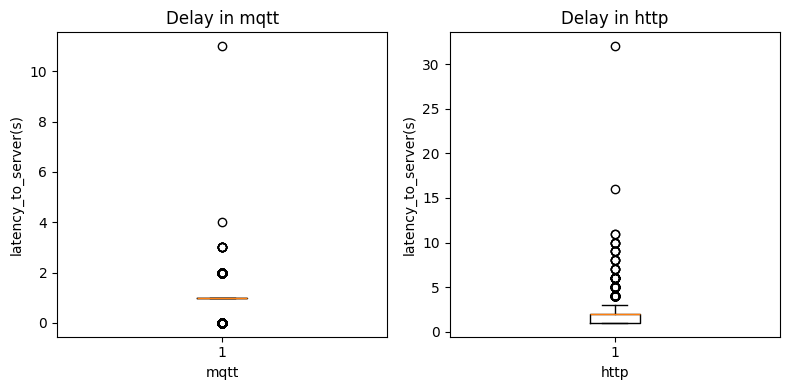

In [87]:
df = df[df["received_at_server"] >= "2025-03-12"]

df_mqtt = df[df['protocol'] == 'mqtt']
df_http = df[df['protocol'] == 'http']

plot_two_boxplots(df1=df_mqtt, df2=df_http, column="latency_to_server(s)", title1="Delay in mqtt", title2="Delay in http", label1="mqtt", label2="http")

In [89]:
print("Jumlah data awal:", len(df_mqtt))
df_subset = df_mqtt.iloc[:13502].copy()
print("Jumlah data setelah disimpan:", len(df_subset))

Jumlah data awal: 14150
Jumlah data setelah disimpan: 13502


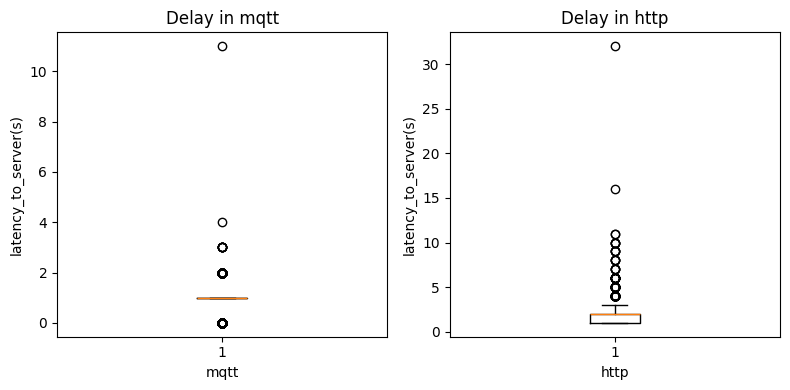

In [90]:
plot_two_boxplots(df1=df_subset, df2=df_http, column="latency_to_server(s)", title1="Delay in mqtt", title2="Delay in http", label1="mqtt", label2="http")

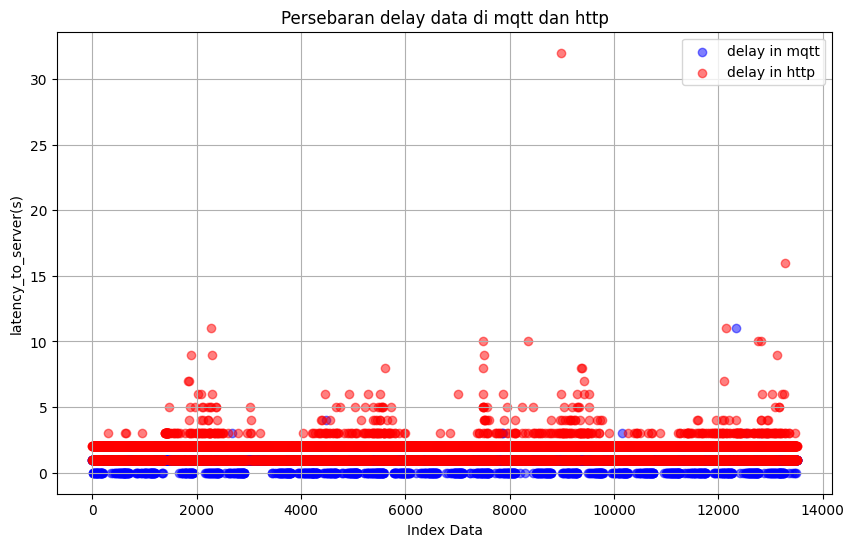

mean delay in mqtt:  0.9349725966523478
mean delay in http:  1.7068582432232262


In [96]:
plot_two_scatter(df1=df_subset, df2=df_http, column="latency_to_server(s)", title="Persebaran delay data di mqtt dan http", label1="delay in mqtt", label2="delay in http")
print("mean delay in mqtt: ", df_subset['latency_to_server(s)'].mean())
print("mean delay in http: ", df_http['latency_to_server(s)'].mean())

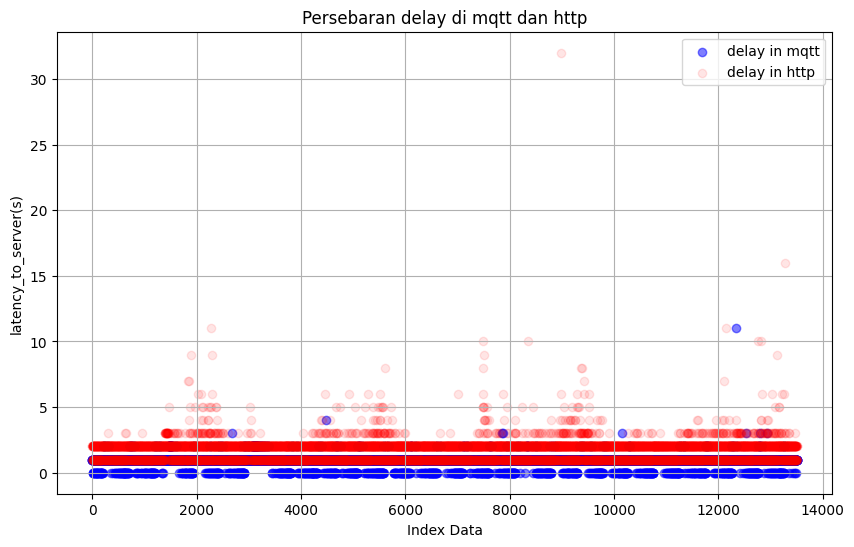

mean delay in mqtt:  0.9349725966523478
mean delay in http:  1.7068582432232262


In [91]:
plot_two_scatter(df1=df_subset, df2=df_http, column="latency_to_server(s)", title="Persebaran delay di mqtt dan http", label1="delay in mqtt", label2="delay in http")
print("mean delay in mqtt: ", df_subset['latency_to_server(s)'].mean())
print("mean delay in http: ", df_http['latency_to_server(s)'].mean())

In [98]:
print("length of delay in MQTT: ", len(df_mqtt['latency_to_server(s)']))
print("length of delay in HTTP: ", len(df_http['latency_to_server(s)']))
print("Max value of delay in MQTT: ", df_mqtt['latency_to_server(s)'].max())
print("Max value of delay in HTTP: ", df_http['latency_to_server(s)'].max())

print("Min value of delay in MQTT: ", df_mqtt['latency_to_server(s)'].min())
print("Min value of delay in HTTP: ", df_http['latency_to_server(s)'].min())

length of delay in MQTT:  14150
length of delay in HTTP:  13502
Max value of delay in MQTT:  11.0
Max value of delay in HTTP:  32.0
Min value of delay in MQTT:  0.0
Min value of delay in HTTP:  1.0


In [97]:
df_mqtt_filtered = df_mqtt[df_mqtt['latency_to_server(s)'] <= 1]
print("jitter in MQTT (<= 3s):", df_mqtt_filtered['latency_to_server(s)'].std())

jitter in MQTT (<= 3s): 0.26879293231786044


In [110]:
df_http_1 = df_http[df_http['latency_to_server(s)'] == 2]
print("len http == 1 : ", len(df_http_1))

len http == 1 :  8217


In [40]:
import numpy as np

latency = df_http['latency_to_server(s)']

Q1 = np.percentile(latency, 25)
Q3 = np.percentile(latency, 75)
IQR = Q3 - Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Filter data tanpa outlier
latency_no_outliers = latency[(latency >= batas_bawah) & (latency <= batas_atas)]

# Hitung jitter (std deviasi) tanpa outlier
jitter_http_no_outliers = latency_no_outliers.std()

print("Jitter HTTP tanpa outlier:", jitter_http_no_outliers)

Jitter HTTP tanpa outlier: 0.5256610020276936


In [13]:
jitter_mqtt = df_mqtt['latency_to_server(s)'].std()
jitter_http = df_http['latency_to_server(s)'].std()

print(f"Jitter MQTT: {jitter_mqtt:.6f} detik")
print(f"Jitter HTTP: {jitter_http:.6f} detik")


Jitter MQTT: 0.303925 detik
Jitter HTTP: 0.709681 detik


In [24]:
# Langkah 1: Ambil kolom yang akan dianalisis
latency = df_mqtt["latency_to_server(s)"]

# Langkah 2: Hitung Q1, Q3, dan IQR
Q1 = latency.quantile(0.25)
Q3 = latency.quantile(0.75)
IQR = Q3 - Q1

# Langkah 3: Tentukan batas bawah dan atas untuk outlier
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Langkah 4: Cari nilai-nilai yang merupakan outlier
outliers = df_mqtt[(latency < batas_bawah) | (latency > batas_atas)]

# Tampilkan jumlah dan contoh
print(f"Jumlah outlier: {len(outliers)}")
print(outliers[["latency_to_server(s)"]].head())


Jumlah outlier: 1241
       latency_to_server(s)
15295                   0.0
15312                   0.0
15323                   0.0
15336                   0.0
15353                   0.0


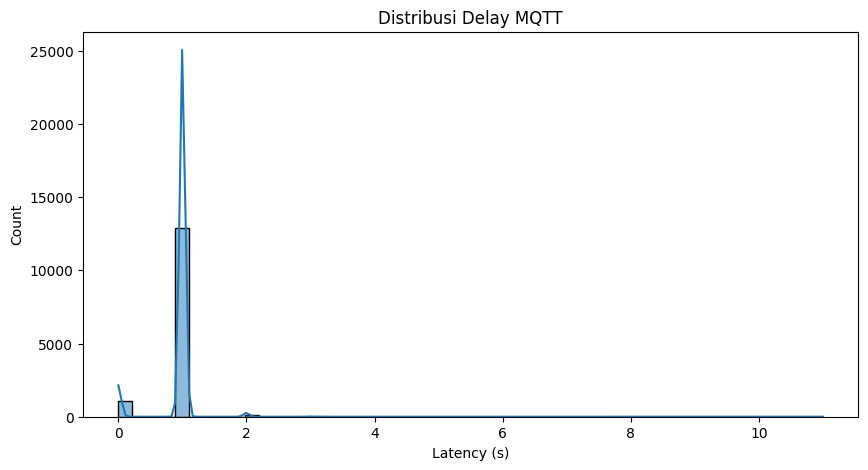

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df_mqtt['latency_to_server(s)'], bins=50, kde=True)
plt.title("Distribusi Delay MQTT")
plt.xlabel("Latency (s)")
plt.show()


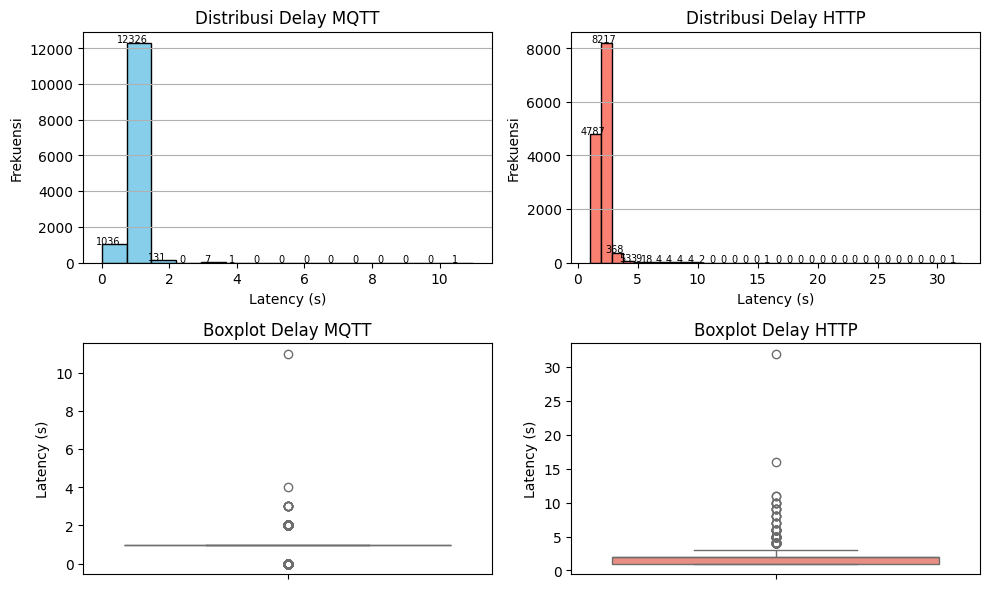

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# ------------------------------
# 1. Histogram MQTT
counts_mqtt, bins_mqtt, _ = axes[0, 0].hist(df_subset['latency_to_server(s)'], bins=15, color='skyblue', edgecolor='black')
for count, x in zip(counts_mqtt, bins_mqtt):
    axes[0, 0].text(x + (bins_mqtt[1] - bins_mqtt[0])/4, count + 1, str(int(count)), ha='center', fontsize=7)
axes[0, 0].set_title("Distribusi Delay MQTT")
axes[0, 0].set_xlabel("Latency (s)")
axes[0, 0].set_ylabel("Frekuensi")
axes[0, 0].grid(axis='y')

# ------------------------------
# 2. Histogram HTTP
counts_http, bins_http, _ = axes[0, 1].hist(df_http['latency_to_server(s)'], bins=34, color='salmon', edgecolor='black')
for count, x in zip(counts_http, bins_http):
    axes[0, 1].text(x + (bins_http[1] - bins_http[0])/4, count + 1, str(int(count)), ha='center', fontsize=7)
axes[0, 1].set_title("Distribusi Delay HTTP")
axes[0, 1].set_xlabel("Latency (s)")
axes[0, 1].set_ylabel("Frekuensi")
axes[0, 1].grid(axis='y')

# ------------------------------
# 3. Boxplot MQTT
sns.boxplot(y=df_subset['latency_to_server(s)'], ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title("Boxplot Delay MQTT")
axes[1, 0].set_ylabel("Latency (s)")

# ------------------------------
# 4. Boxplot HTTP
sns.boxplot(y=df_http['latency_to_server(s)'], ax=axes[1, 1], color='salmon')
axes[1, 1].set_title("Boxplot Delay HTTP")
axes[1, 1].set_ylabel("Latency (s)")

# ------------------------------
plt.tight_layout()
plt.show()


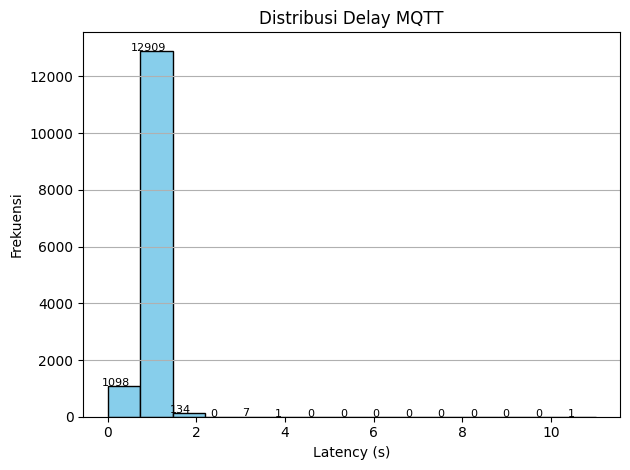

In [104]:
import matplotlib.pyplot as plt

# Contoh histogram
counts, bins, patches = plt.hist(df_mqtt['latency_to_server(s)'], bins=15, color='skyblue', edgecolor='black')

# Tambahkan label di atas setiap batang
for count, x in zip(counts, bins):
    plt.text(x + (bins[1] - bins[0])/4, count + 1, str(int(count)), ha='center', fontsize=8)

plt.xlabel("Latency (s)")
plt.ylabel("Frekuensi")
plt.title("Distribusi Delay MQTT")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [27]:
# Gunakan kembali Q1, Q3, IQR dari sebelumnya
latency = df_mqtt["latency_to_server(s)"]
Q1 = latency.quantile(0.25)
Q3 = latency.quantile(0.75)
IQR = Q3 - Q1
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Ambil outlier tapi hilangkan nilai 0.0
outliers_nonzero = df_mqtt[
    ((latency < batas_bawah) | (latency > batas_atas)) & (latency != 0.0)
]

# Lihat hasil
print(f"Jumlah outlier non-zero: {len(outliers_nonzero)}")
print(outliers_nonzero[["latency_to_server(s)"]].sort_values(by="latency_to_server(s)", ascending=False).head(10))


Jumlah outlier non-zero: 143
       latency_to_server(s)
39989                  11.0
24290                   4.0
40385                   3.0
20632                   3.0
40895                   3.0
35653                   3.0
41170                   3.0
31120                   3.0
31141                   3.0
30729                   2.0


In [17]:
df_mqtt_filter = df_mqtt.drop(columns=["voltage", "current", "power", "energy", "frequency", "power_factor", "time_at_device", "latency_in_lora(s)", "RSSI", "devUI"])
df_http_filter = df_http.drop(columns=["voltage", "current", "power", "energy", "frequency", "power_factor", "time_at_device", "latency_in_lora(s)", "RSSI", "devUI"])

In [20]:
df_mqtt_filter = df_mqtt_filter.drop(columns=['time_received_at_gateway'])
df_mqtt_filter.head(10)

,received_at_server,time_send_from_gateway,protocol,latency_to_server(s)
15287,2025-03-12 00:00:16,2025-03-12 00:00:15,mqtt,1.0
15288,2025-03-12 00:00:26,2025-03-12 00:00:25,mqtt,1.0
15289,2025-03-12 00:00:36,2025-03-12 00:00:35,mqtt,1.0
15293,2025-03-12 00:01:18,2025-03-12 00:01:17,mqtt,1.0
15294,2025-03-12 00:01:28,2025-03-12 00:01:27,mqtt,1.0
15295,2025-03-12 00:01:38,2025-03-12 00:01:38,mqtt,0.0
15299,2025-03-12 00:02:20,2025-03-12 00:02:19,mqtt,1.0
15300,2025-03-12 00:02:30,2025-03-12 00:02:29,mqtt,1.0
15301,2025-03-12 00:02:41,2025-03-12 00:02:40,mqtt,1.0
15305,2025-03-12 00:03:22,2025-03-12 00:03:21,mqtt,1.0


In [21]:
df_mqtt_filter.head(10).to_excel("mqtt_10_teratas.xlsx", index=False)
df_http_filter.head(10).to_excel("http_10_teratas.xlsx", index=False)